In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [2]:
multi_dataDIR = '/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07*U*.nc'
TAS2 = xr.open_mfdataset(multi_dataDIR)
TAS2

<xarray.Dataset>
Dimensions:            (time_counter: 696, y: 1181, x: 1480, depthu: 1)
Coordinates:
  * depthu             (depthu) float32 0.4805
  * time_counter       (time_counter) datetime64[ns] 2009-07-01T00:30:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    degraded_vozocrtx  (time_counter, y, x) float32 dask.array<chunksize=(24, 1181, 1480), meta=np.ndarray>
    nav_lat            (time_counter, y, x) float32 dask.array<chunksize=(24, 1181, 1480), meta=np.ndarray>
    nav_lon            (time_counter, y, x) float32 dask.array<chunksize=(24, 1181, 1480), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:01 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [3]:
umean = TAS2.degraded_vozocrtx.mean(dim='time_counter')

In [4]:
umean.shape

(1181, 1480)

In [5]:
vit1 = TAS2.degraded_vozocrtx.mean(dim='time_counter')
navlon = TAS2.nav_lon
navlat = TAS2.nav_lat

In [6]:
vit1.size

1747880

In [7]:
vit1.shape

(1181, 1480)

In [8]:
vit_mask=ma.masked_where(vit1==0.,vit1)

1216524480

In [23]:
print(lon.shape)
print(lat.shape)
print(vit_mask.shape)

(1181, 1480)
(1181, 1480)
(1181, 1480)


In [17]:
navlat

<xarray.DataArray 'nav_lat' (time_counter: 696, y: 1181, x: 1480)>
dask.array<concatenate, shape=(696, 1181, 1480), dtype=float32, chunksize=(24, 1181, 1480), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2009-07-01T00:30:00 ... 2009-...
Dimensions without coordinates: y, x
Attributes:
    units:      degrees_north
    valid_min:  -90.0
    valid_max:  90.0
    long_name:  Latitude
    nav_model:  Default grid

0.0


In [22]:
lat = navlat.sel(time_counter='2009-07-01T00:30:00.000000000')
lon = navlon.sel(time_counter='2009-07-01T00:30:00.000000000')

/tmp/ipykernel_193434/3025347355.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Moy_v_Ubottom_07_2009.png', bbbox_inches='tight')


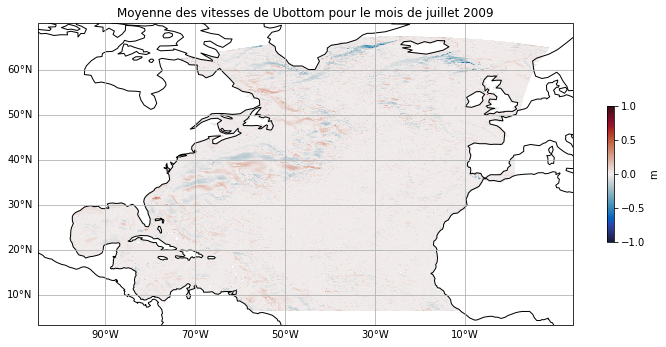

In [28]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,vit_mask,transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,vmin=-1,vmax=1)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne des vitesses de Ubottom pour le mois de juillet 2009')
plt.savefig('Moy_v_Ubottom_07_2009.png', bbbox_inches='tight')
